In [2]:
import numpy as np
import os

from tflite_model_maker.config import QuantizationConfig
from tflite_model_maker.config import ExportFormat
from tflite_model_maker import model_spec
from tflite_model_maker import object_detector

import tensorflow as tf

In [3]:
spec = model_spec.get('efficientdet_lite2')

In [4]:
# label_map = ["Bell_pepper leaf", "grape leaf", "Cherry leaf", "Tomato leaf yellow virus", "Strawberry leaf", "Apple leaf", "Raspberry leaf", "Tomato Septoria leaf spot",
#             "Potato leaf late blight", "Squash Powdery mildew leaf", "Blueberry leaf", "Corn rust leaf", "Tomato Early blight leaf", "Tomato leaf mosaic virus",
#             "Apple Scab Leaf", "Corn Gray leaf spot", "Tomato mold leaf", "Peach leaf", "Apple rust leaf", "Tomato leaf bacterial spot", "Tomato leaf late blight",
#             "Tomato leaf", "Bell_pepper leaf spot", "Corn leaf blight", "Soyabean leaf", "Potato leaf early blight", "grape leaf black rot", "Tomato two spotted spider mites leaf", 
#             "Soybean leaf", "Potato leaf"]

In [5]:
label_map = ["leaf"]

rename all image, and annotation if possible with fifty one

In [6]:
path = "plant_doc/train"
train_data  = object_detector.DataLoader.from_pascal_voc(path, path, label_map=label_map)

INFO:tensorflow:Cache will be stored in C:\Users\SHINSA~1\AppData\Local\Temp\tmpvzoglb98 with prefix filename 7bee435cfee6949ada7cad38d32e815e. Cache_prefix is C:\Users\SHINSA~1\AppData\Local\Temp\tmpvzoglb98\7bee435cfee6949ada7cad38d32e815e
INFO:tensorflow:On image 0
INFO:tensorflow:On image 100
INFO:tensorflow:On image 200
INFO:tensorflow:On image 300
INFO:tensorflow:On image 400
INFO:tensorflow:On image 500
INFO:tensorflow:On image 600
INFO:tensorflow:On image 700
INFO:tensorflow:On image 800
INFO:tensorflow:On image 900
INFO:tensorflow:On image 1000
INFO:tensorflow:On image 1100
INFO:tensorflow:On image 1200
INFO:tensorflow:On image 1300
INFO:tensorflow:On image 1400
INFO:tensorflow:On image 1500
INFO:tensorflow:On image 1600
INFO:tensorflow:On image 1700
INFO:tensorflow:On image 1800
INFO:tensorflow:On image 1900
INFO:tensorflow:On image 2000
INFO:tensorflow:On image 2100
INFO:tensorflow:On image 2200
INFO:tensorflow:On image 2300


In [7]:
path = "plant_doc/test"
val_data = object_detector.DataLoader.from_pascal_voc(path, path, label_map=label_map)

INFO:tensorflow:Cache will be stored in C:\Users\SHINSA~1\AppData\Local\Temp\tmpfedms02y with prefix filename fd42585a6188df7d3abc4e516ad0ebb5. Cache_prefix is C:\Users\SHINSA~1\AppData\Local\Temp\tmpfedms02y\fd42585a6188df7d3abc4e516ad0ebb5
INFO:tensorflow:On image 0
INFO:tensorflow:On image 100
INFO:tensorflow:On image 200


In [8]:
# gpus = tf.config.list_physical_devices('GPU')
# if gpus:
#   # Restrict TensorFlow to only allocate 1GB of memory on the first GPU
#   try:
#     tf.config.set_logical_device_configuration(
#         gpus[0],
#         [tf.config.LogicalDeviceConfiguration(memory_limit=8024)])
#     logical_gpus = tf.config.list_logical_devices('GPU')
#     print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
#   except RuntimeError as e:
#     # Virtual devices must be set before GPUs have been initialized
#     print(e)

In [9]:
spec = object_detector.EfficientDetSpec(model_name = "efficientdet-lite2", uri = "https://tfhub.dev/tensorflow/efficientdet/lite2/feature-vector/1", strategy="gpu")

In [10]:
model = object_detector.create(train_data, model_spec=spec, batch_size=8, train_whole_model=True, validation_data=val_data)

INFO:tensorflow:Retraining the models...
Epoch 1/50
291/291 [==============================] - 224s 657ms/step - det_loss: 0.9440 - cls_loss: 0.5682 - box_loss: 0.0075 - reg_l2_loss: 0.0761 - loss: 1.0200 - learning_rate: 0.0090 - gradient_norm: 3.3946 - val_det_loss: 0.6476 - val_cls_loss: 0.4037 - val_box_loss: 0.0049 - val_reg_l2_loss: 0.0763 - val_loss: 0.7240
Epoch 2/50
291/291 [==============================] - 186s 640ms/step - det_loss: 0.6565 - cls_loss: 0.3991 - box_loss: 0.0051 - reg_l2_loss: 0.0765 - loss: 0.7331 - learning_rate: 0.0100 - gradient_norm: 2.9909 - val_det_loss: 0.4714 - val_cls_loss: 0.2937 - val_box_loss: 0.0036 - val_reg_l2_loss: 0.0767 - val_loss: 0.5481
Epoch 3/50
291/291 [==============================] - 187s 641ms/step - det_loss: 0.6037 - cls_loss: 0.3688 - box_loss: 0.0047 - reg_l2_loss: 0.0768 - loss: 0.6805 - learning_rate: 0.0099 - gradient_norm: 2.6489 - val_det_loss: 0.4674 - val_cls_loss: 0.2942 - val_box_loss: 0.0035 - val_reg_l2_loss: 0.0769 

In [11]:
# model.evaluate(test_data)

In [19]:
model.export(export_dir='.')

INFO:tensorflow:Assets written to: C:\Users\SHINSA~1\AppData\Local\Temp\tmpcgz4rwfm\assets


INFO:tensorflow:Assets written to: C:\Users\SHINSA~1\AppData\Local\Temp\tmpcgz4rwfm\assets


INFO:tensorflow:Label file is inside the TFLite model with metadata.


INFO:tensorflow:Label file is inside the TFLite model with metadata.


INFO:tensorflow:Saving labels in C:\Users\SHINSA~1\AppData\Local\Temp\tmpv9d7nm4d\labelmap.txt.


INFO:tensorflow:Saving labels in C:\Users\SHINSA~1\AppData\Local\Temp\tmpv9d7nm4d\labelmap.txt.


INFO:tensorflow:TensorFlow Lite model exported successfully: .\model.tflite


INFO:tensorflow:TensorFlow Lite model exported successfully: .\model.tflite


In [20]:
# Load the labels into a list
classes = ['???'] * model.model_spec.config.num_classes
label_map = model.model_spec.config.label_map
for label_id, label_name in label_map.as_dict().items():
  classes[label_id-1] = label_name

In [21]:
np.save("./classes.npy",classes)

data = list(label_map.as_dict().items())
an_array = np.array(data)
np.save("./label_map.npy",an_array)

Inference from here

In [22]:
classes=np.load("./classes.npy")

In [23]:
import matplotlib.pyplot as plt
def crop_image(img,  ymin, xmin, ymax, xmax, n):
    X = int((xmax - xmin)/2)
    Y = int((ymax - ymin)/2)
    H = int(ymax - ymin)
    W = int(xmax - xmin)
    plt.imshow(img)
    print([X,Y,W,H])
    cropped_image = img[ymin:ymax, xmin:xmax]
    plt.imshow(cropped_image)
    cv2.imwrite(f'contour_{n}.png', cropped_image)

In [24]:
import cv2

from PIL import Image


model_path = 'model.tflite'

# Define a list of colors for visualization
COLORS = np.random.randint(0, 255, size=(len(classes), 3), dtype=np.uint8)

def preprocess_image(image_path, input_size):
  """Preprocess the input image to feed to the TFLite model"""
  img = tf.io.read_file(image_path)
  img = tf.io.decode_image(img, channels=3)
  img = tf.image.convert_image_dtype(img, tf.uint8)
  original_image = img
  resized_img = tf.image.resize(img, input_size)
  resized_img = resized_img[tf.newaxis, :]
  resized_img = tf.cast(resized_img, dtype=tf.uint8)
  return resized_img, original_image


def detect_objects(interpreter, image, threshold):
  """Returns a list of detection results, each a dictionary of object info."""

  signature_fn = interpreter.get_signature_runner()

  # Feed the input image to the model
  output = signature_fn(images=image)

  # Get all outputs from the model
  count = int(np.squeeze(output['output_0']))
  scores = np.squeeze(output['output_1'])
  classes = np.squeeze(output['output_2'])
  boxes = np.squeeze(output['output_3'])
  
  results = []
  for i in range(count):
    if scores[i] >= threshold:
      result = {
        'bounding_box': boxes[i],
        'class_id': classes[i],
        'score': scores[i]
      }
      results.append(result)
  return results


def run_odt_and_draw_results(image_path, interpreter, threshold=0.5):
  """Run object detection on the input image and draw the detection results"""
  # Load the input shape required by the model
  _, input_height, input_width, _ = interpreter.get_input_details()[0]['shape']

  # Load the input image and preprocess it
  preprocessed_image, original_image = preprocess_image(
      image_path,
      (input_height, input_width)
    )

  # Run object detection on the input image
  results = detect_objects(interpreter, preprocessed_image, threshold=threshold)

  # Plot the detection results on the input image
  original_image_np = original_image.numpy().astype(np.uint8)
  count = 0

  for obj in results:
    # Convert the object bounding box from relative coordinates to absolute
    # coordinates based on the original image resolution
    ymin, xmin, ymax, xmax = obj['bounding_box']
    xmin = int(xmin * original_image_np.shape[1])
    xmax = int(xmax * original_image_np.shape[1])
    ymin = int(ymin * original_image_np.shape[0])
    ymax = int(ymax * original_image_np.shape[0])

    count +=1
    crop_image(original_image_np, ymin, xmin, ymax, xmax, count)

  for obj in results:
    # Convert the object bounding box from relative coordinates to absolute
    # coordinates based on the original image resolution
    ymin, xmin, ymax, xmax = obj['bounding_box']
    xmin = int(xmin * original_image_np.shape[1])
    xmax = int(xmax * original_image_np.shape[1])
    ymin = int(ymin * original_image_np.shape[0])
    ymax = int(ymax * original_image_np.shape[0])

    # Find the class index of the current object
    class_id = int(obj['class_id'])

    # Draw the bounding box and label on the image
    color = [int(c) for c in COLORS[class_id]]
    cv2.rectangle(original_image_np, (xmin, ymin), (xmax, ymax), color, 2)
    # Make adjustments to make the label visible for all objects
    y = ymin - 15 if ymin - 15 > 15 else ymin + 15
    label = "{}: {:.0f}%".format(classes[class_id], obj['score'] * 100)
    cv2.putText(original_image_np, label, (xmin, y),
        cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)

  # Return the final image
  original_uint8 = original_image_np.astype(np.uint8)
  return original_uint8

[111, 46, 222, 92]
[96, 73, 192, 146]
[105, 65, 210, 130]
[61, 96, 123, 193]


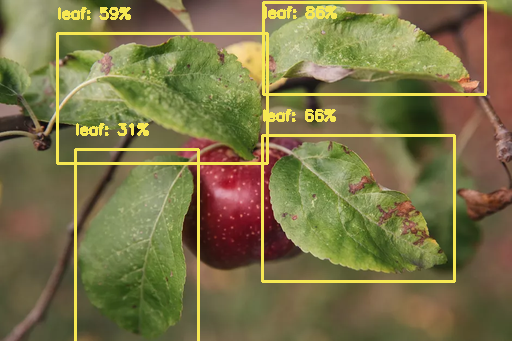

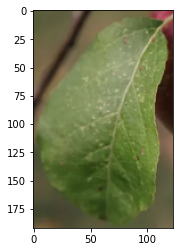

In [25]:
DETECTION_THRESHOLD = 0.3

# TEMP_FILE = 'leaf_plant_tf_records/test.record/data/0a769a71-052a-4f19-a4d8-b0f0cb75541c___FREC_Scab 3165.jpg'
TEMP_FILE = "apple-tree-diseases.jpg"
# TEMP_FILE = "test.jpg"

im = Image.open(TEMP_FILE)
im.thumbnail((512, 512), Image.ANTIALIAS)
im.save(TEMP_FILE, 'PNG')

# Load the TFLite model
interpreter = tf.lite.Interpreter(model_path=model_path)
interpreter.allocate_tensors()

# Run inference and draw detection result on the local copy of the original file
detection_result_image = run_odt_and_draw_results(
    TEMP_FILE,
    interpreter,
    threshold=DETECTION_THRESHOLD
)

# Show the detection result
Image.fromarray(detection_result_image)